<a href="https://colab.research.google.com/github/csadrian/adatbanya/blob/master/Fitting_a_decision_tree_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Döntési fa illesztése az Iris adathalmazra

### Az Iris adathalmaz betöltése

Töltsük be az Iris példa adathalmazt az sklearn csomagból.

In [0]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
x = iris.data
y = iris.target

Mit tartalmaz ez az iris változó?

In [77]:
iris.keys()
print("x shape:", x.shape) # Az x egy numpy array, amelynek shape-je: (150, 4)
print("y shape:", y.shape) # Az y egy numpy array, amelynek shape-je: (150,)
print("first 10 from x:", x[:10]) # Írassuk ki az első 10 sorát az x-nek
print("first 10 from y:", y[:10]) # Írassuk ki az első 10 sorát az y-nak
print(y) # Írassuk ki az y-t

x shape: (150, 4)
y shape: (150,)
first 10 from x: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
first 10 from y: [0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Ismerjük meg az Iris adathalmaz

In [0]:
import numpy as np
import pandas as pd

y_expanded = np.expand_dims(y, axis=1)
x_and_y = np.concatenate([x, y_expanded], axis=1)
x_and_y_df = pd.DataFrame(data=dataset, columns=iris.feature_names+['species'])

Jelenítsünk meg néhány scatter plotot és hisztogramot, hogy legyen egy képünk az adathalmaz attrobútumainak eloszlásáról, és a páronkénti korrelációkról, színezzünk a célváltozónk értéke szerint.

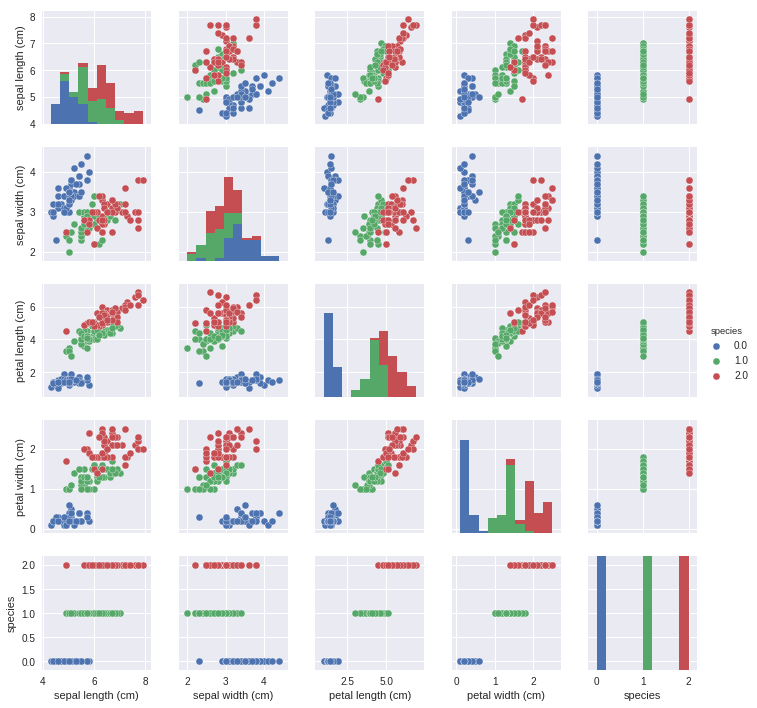

In [65]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(x_and_y_df, hue='species', size=2.0);

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


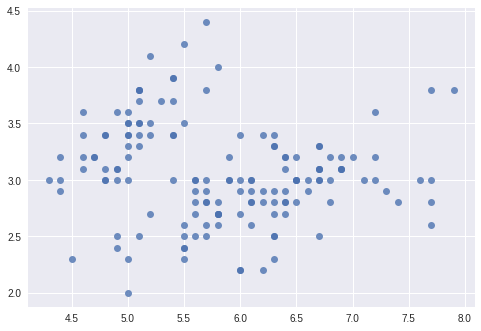

In [85]:
print(x[:,0])
ax = sns.regplot(x[:,0], x[:,1], fit_reg=False)

### Tanítsunk be egy döntési fát

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [97]:
print("x_train_shape", x_train.shape)
print("y_train_shape", y_train.shape)
print("x_test_shape", x_test.shape)
print("y_test_shape", y_test.shape)

x_train_shape (105, 4)
y_train_shape (105,)
x_test_shape (45, 4)
y_test_shape (45,)


In [0]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

Hogyan teljesít a betanított model a hold-out test set-en?

In [106]:
from sklearn.metrics import accuracy_score

y_test_model = model.predict(x_test)
accuracy_score(y_test, y_test_model)

0.9555555555555556

Hogyan teljesít a betanított model a hold-out train set-en?

In [108]:
y_train_model = model.predict(x_train)
accuracy_score(y_train, y_train_model)

1.0

Megkérdezhetjük azt is, hogy a model milyen valószínűséget jósol az egyes osztályoknak.


In [117]:
y_test_model_probas = model.predict_proba(x_test)
print(y_test_model_probas)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


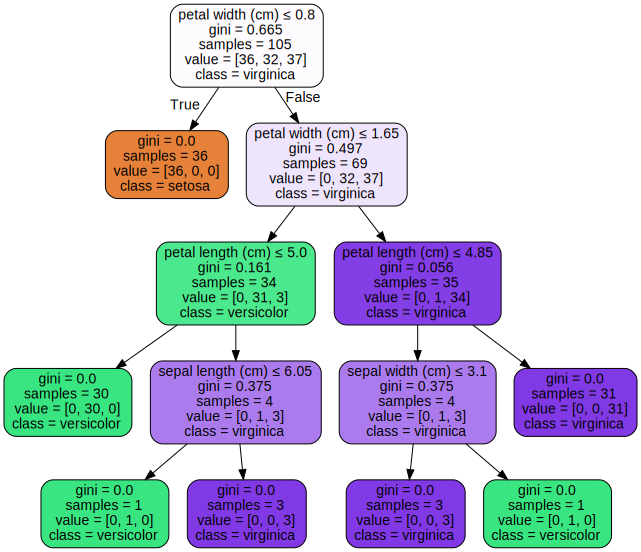

In [101]:
import graphviz
from IPython.display import Image

#dot_data = tree.export_graphviz(clf, out_file=None) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

### Röviden az egész


In [111]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

y_test_model = model.predict(x_test)
accuracy_score(y_test, y_test_model)

0.9555555555555556

### Készítsünk egy k legközelebbi szomszéd klasszifikátort is 

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train, y_train)
y_test_model = knn_model.predict(x_test)
accuracy_score(y_test, y_test_model)

0.9777777777777777